## 필요한 라이브러리 불러오기

In [ ]:
# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Matplotlib에 나눔바른고딕 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 국민여행조사 데이터 가공

In [ ]:
data_2024 = pd.read_excel('/content/MyDrive/MyDrive/BDA 공모전/data/2024_국민여행조사_취합본.xlsx', skiprows=1)

In [ ]:
df_2024 = data_2024.copy()
df_2024.head()

,ID,D_TRA1_CASE,D_TRA1_S_Day,D_TRA1_ONE_COST,D_TRA1_1_SPOT,D_TRA1_1_Q6,A3_1,A3_2,A3_3,A4_1,...,NA7_2,NA7_4,NA7_6,PA8D_2,NA8D_2,NA8D_3,NA8G_5,A8SF_3,A9,A10
0,11010550271_275001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11010550271_275003,1.0,1.0,340002.0,32030.0,4.0,2.0,8.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,16667.0,0.0,NaN,4.0,4.0
2,11010550271_275004,1.0,1.0,303333.0,32030.0,NaN,1.0,12.0,8.0,1.0,...,0.0,0.0,0.0,1.0,0.0,16667.0,16667.0,NaN,4.0,4.0
3,11010550271_275007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010550271_275008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51754 entries, 0 to 51753
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               51754 non-null  object 
 1   D_TRA1_CASE      26342 non-null  float64
 2   D_TRA1_S_Day     26342 non-null  float64
 3   D_TRA1_ONE_COST  26342 non-null  float64
 4   D_TRA1_1_SPOT    26342 non-null  float64
 5   D_TRA1_1_Q6      8458 non-null   float64
 6   A3_1             23863 non-null  float64
 7   A3_2             22280 non-null  float64
 8   A3_3             16205 non-null  float64
 9   A4_1             18360 non-null  float64
 10  A4_2             14563 non-null  float64
 11  A4_3             1499 non-null   float64
 12  A4_4             2439 non-null   float64
 13  A4_5             1795 non-null   float64
 14  A4_6             13916 non-null  float64
 15  A4_7             461 non-null    float64
 16  A4_8             1534 non-null   float64
 17  A4_9        

## 여행 다녀오지 않은 사람 지우기

1. ID 칼럼 제외 모든 칼럼 값이 NaN인 행 삭제

In [ ]:
print(df_2024.shape)

(51754, 54)


In [ ]:
df_2024.dropna(axis=0, how='all', subset=df_2024.columns.difference(['ID']), inplace=True)

In [ ]:
print(df_2024.shape)

(26463, 54)


-> 절반 정도 줄어듦

2. '여행1차_여행유형'이 '여행'인 경우만 남기기

- 1. 국내 관광/휴양여행
- 2. 국내 가족/친지/친구 방문여행
- 3. 국내 단순 가족/친지/친구 방문
- 4. 국내 출장/업무 여행
- 5. 국내 단순 출장/업무 경험

1, 2, 4 만 남기기

In [ ]:
df_2024 = df_2024[df_2024['D_TRA1_CASE'].isin([1, 2, 4])]

In [ ]:
df_2024.head()

,ID,D_TRA1_CASE,D_TRA1_S_Day,D_TRA1_ONE_COST,D_TRA1_1_SPOT,D_TRA1_1_Q6,A3_1,A3_2,A3_3,A4_1,...,NA7_2,NA7_4,NA7_6,PA8D_2,NA8D_2,NA8D_3,NA8G_5,A8SF_3,A9,A10
1,11010550271_275003,1.0,1.0,340002.0,32030.0,4.0,2.0,8.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,16667.0,0.0,NaN,4.0,4.0
2,11010550271_275004,1.0,1.0,303333.0,32030.0,NaN,1.0,12.0,8.0,1.0,...,0.0,0.0,0.0,1.0,0.0,16667.0,16667.0,NaN,4.0,4.0
5,11010550271_275011,1.0,1.0,313334.0,38090.0,NaN,2.0,5.0,8.0,1.0,...,0.0,0.0,0.0,1.0,0.0,16667.0,10000.0,0.0,4.0,4.0
11,11010680011_420482,1.0,0.0,16500.0,31270.0,NaN,5.0,13.0,9.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,4.0,4.0
13,11010680011_420489,1.0,0.0,35000.0,34060.0,NaN,5.0,1.0,8.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,4.0,4.0


In [ ]:
print(df_2024.shape)

(23444, 54)


## '여행지에서의 활동 21개' 칼럼 이진 분류

In [ ]:
# 대상 칼럼
cols_to_binary = [
    'A4_1', 'A4_2', 'A4_3', 'A4_4', 'A4_5', 'A4_6', 'A4_7',
    'A4_8', 'A4_9', 'A4_10', 'A4_11', 'A4_12', 'A4_13',
    'A4_14', 'A4_15', 'A4_16', 'A4_17', 'A4_18', 'A4_19',
    'A4_20', 'A4_21'
]

existing_cols = [col for col in cols_to_binary if col in df_2024.columns]
df_2024[existing_cols] = df_2024[existing_cols].notnull().astype(int)

## '동반자 유형' 맞추기

'동반자 유형' 칼럼에 값이 있으면 1, NaN이면 0

In [ ]:
# 2024년: A6B_1 ~ A6B_12
a6b_cols_2024 = [f'A6B_{i}' for i in range(1, 13)]
df_2024[a6b_cols_2024] = df_2024[a6b_cols_2024].notna().astype(int)

In [ ]:
data_2024[a6b_cols_2024].head()

,A6B_1,A6B_2,A6B_3,A6B_4,A6B_5,A6B_6,A6B_7,A6B_8,A6B_9,A6B_10,A6B_11,A6B_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'새로운 동반자 유형' 칼럼 생성

: new_A6B_1 ~ new_A6B_6

- new_A6B_1	가족/친척
- new_A6B_2	친구/연인
- new_A6B_3	직장 동료
- new_A6B_4	친목모임
- new_A6B_5	학교 단체
- new_A6B_6	기타



In [ ]:
# 2024년 A6B_1 ~ A6B_12 → new_A6B_1 ~ new_A6B_6 변환
df_2024['new_A6B_1'] = df_2024[[f'A6B_{i}' for i in range(1, 7)]].max(axis=1)    # 가족/친척
df_2024['new_A6B_2'] = df_2024[['A6B_7', 'A6B_8']].max(axis=1)                   # 친구/연인
df_2024['new_A6B_3'] = df_2024['A6B_9']                                           # 직장동료
df_2024['new_A6B_4'] = df_2024['A6B_10']                                          # 친목모임
df_2024['new_A6B_5'] = df_2024['A6B_11']                                          # 학교단체
df_2024['new_A6B_6'] = df_2024['A6B_12']                                          # 기타

# 기존 A6B 칼럼 제거
df_2024.drop(columns=a6b_cols_2024, inplace=True)

In [ ]:
df_2024.head()

,ID,D_TRA1_CASE,D_TRA1_S_Day,D_TRA1_ONE_COST,D_TRA1_1_SPOT,D_TRA1_1_Q6,A3_1,A3_2,A3_3,A4_1,...,NA8G_5,A8SF_3,A9,A10,new_A6B_1,new_A6B_2,new_A6B_3,new_A6B_4,new_A6B_5,new_A6B_6
1,11010550271_275003,1.0,1.0,340002.0,32030.0,4.0,2.0,8.0,1.0,1,...,0.0,NaN,4.0,4.0,1,0,0,0,0,0
2,11010550271_275004,1.0,1.0,303333.0,32030.0,NaN,1.0,12.0,8.0,1,...,16667.0,NaN,4.0,4.0,1,0,0,0,0,0
5,11010550271_275011,1.0,1.0,313334.0,38090.0,NaN,2.0,5.0,8.0,1,...,10000.0,0.0,4.0,4.0,0,1,0,0,0,0
11,11010680011_420482,1.0,0.0,16500.0,31270.0,NaN,5.0,13.0,9.0,1,...,0.0,NaN,4.0,4.0,1,0,0,0,0,0
13,11010680011_420489,1.0,0.0,35000.0,34060.0,NaN,5.0,1.0,8.0,1,...,0.0,NaN,4.0,4.0,0,0,0,1,0,0


## 소비 관련 칼럼 이진분류

In [ ]:
cost_cols = ['NA7_2', 'NA7_4', 'NA7_6', 'NA8D_2', 'NA8D_3', 'NA8G_5', 'A8SF_3']
df_2024[cost_cols].head()

,NA7_2,NA7_4,NA7_6,NA8D_2,NA8D_3,NA8G_5,A8SF_3
1,0.0,0.0,0.0,0.0,16667.0,0.0,NaN
2,0.0,0.0,0.0,0.0,16667.0,16667.0,NaN
5,0.0,0.0,0.0,0.0,16667.0,10000.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
cost_cols = ['NA7_2', 'NA7_4', 'NA7_6', 'NA8D_2', 'NA8D_3', 'NA8G_5', 'A8SF_3']

existing_cols = [col for col in cost_cols if col in df_2024.columns]
for col in existing_cols:
    df_2024[col] = df_2024[col].apply(lambda x: 1 if pd.notna(x) and x != 0 else 0)

In [ ]:
df_2024[cost_cols].head()

,NA7_2,NA7_4,NA7_6,NA8D_2,NA8D_3,NA8G_5,A8SF_3
1,0,0,0,0,1,0,0
2,0,0,0,0,1,1,0
5,0,0,0,0,1,1,0
11,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0


## '여행1차_여행일수(박)'

0박 기준이라 +1 해서 총 여행 일수로 변경

In [ ]:
df_2024['D_TRA1_S_Day'].head()

,D_TRA1_S_Day
1,1.0
2,1.0
5,1.0
11,0.0
13,0.0


In [ ]:
df_2024['D_TRA1_S_Day'] = pd.to_numeric(df_2024['D_TRA1_S_Day'], errors='coerce')  # 숫자 변환, 실패 시 NaN 유지
df_2024['D_TRA1_S_Day'] = df_2024['D_TRA1_S_Day'] + 1  # NaN는 유지됨

In [ ]:
df_2024['D_TRA1_S_Day'].head()

,D_TRA1_S_Day
1,2.0
2,2.0
5,2.0
11,1.0
13,1.0


In [ ]:
df_2024.head()

,ID,D_TRA1_CASE,D_TRA1_S_Day,D_TRA1_ONE_COST,D_TRA1_1_SPOT,D_TRA1_1_Q6,A3_1,A3_2,A3_3,A4_1,...,NA8G_5,A8SF_3,A9,A10,new_A6B_1,new_A6B_2,new_A6B_3,new_A6B_4,new_A6B_5,new_A6B_6
1,11010550271_275003,1.0,2.0,340002.0,32030.0,4.0,2.0,8.0,1.0,1,...,0,0,4.0,4.0,1,0,0,0,0,0
2,11010550271_275004,1.0,2.0,303333.0,32030.0,NaN,1.0,12.0,8.0,1,...,1,0,4.0,4.0,1,0,0,0,0,0
5,11010550271_275011,1.0,2.0,313334.0,38090.0,NaN,2.0,5.0,8.0,1,...,1,0,4.0,4.0,0,1,0,0,0,0
11,11010680011_420482,1.0,1.0,16500.0,31270.0,NaN,5.0,13.0,9.0,1,...,0,0,4.0,4.0,1,0,0,0,0,0
13,11010680011_420489,1.0,1.0,35000.0,34060.0,NaN,5.0,1.0,8.0,1,...,0,0,4.0,4.0,0,0,0,1,0,0


## 명목형 변수 원핫인코딩

- 여행1차_여행유형
- 여행1차_1번째방문지_숙박 시설
- 여행지 선택 이유_1순위
- 여행지 선택 이유_2순위
- 여행지 선택 이유_3순위

In [ ]:
dfs = {'df_2024': df_2024}
cols_to_encode = ['D_TRA1_CASE', 'D_TRA1_1_Q6', 'A3_1', 'A3_2', 'A3_3']

for name, df in dfs.items():
    existing_cols = [col for col in cols_to_encode if col in df.columns]
    if existing_cols:
        df_encoded = pd.get_dummies(df, columns=existing_cols, prefix=existing_cols, dummy_na=False, dtype=float)
        dfs[name] = df_encoded
        print(f"{name} 원핫인코딩 완료, 컬럼 수: {len(df_encoded.columns)}")
    else:
        print(f"{name}에는 인코딩할 컬럼이 없습니다.")

df_2024_onehot = dfs['df_2024']

df_2024 원핫인코딩 완료, 컬럼 수: 105


In [ ]:
df_2024_onehot.head()

,ID,D_TRA1_S_Day,D_TRA1_ONE_COST,D_TRA1_1_SPOT,A4_1,A4_2,A4_3,A4_4,A4_5,A4_6,...,A3_3_6.0,A3_3_7.0,A3_3_8.0,A3_3_9.0,A3_3_10.0,A3_3_11.0,A3_3_12.0,A3_3_13.0,A3_3_14.0,A3_3_15.0
1,11010550271_275003,2.0,340002.0,32030.0,1,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11010550271_275004,2.0,303333.0,32030.0,1,1,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11010550271_275011,2.0,313334.0,38090.0,1,1,0,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,11010680011_420482,1.0,16500.0,31270.0,1,1,1,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13,11010680011_420489,1.0,35000.0,34060.0,1,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 지역 기준 데이터 생성

### 지역 기준 그룹화 데이터 생성

- D_TRA1_1_SPOT (지역) 컬럼을 기준으로 그룹화

- 수치형 변수는 평균, 원핫 인코딩된 명목형 변수는 비율로 해석

In [ ]:
display(df_2024_onehot.groupby('D_TRA1_1_SPOT').size())
df_2024_onehot.groupby('D_TRA1_1_SPOT').size().values

,0
D_TRA1_1_SPOT,
11010.0,163
11020.0,66
11030.0,37
11040.0,33
11050.0,32
...,...
38380.0,53
38390.0,99
38400.0,99


array([163,  66,  37,  33,  32,  23,   3,   5,  15,  21,  14,  15,  10,
        60,   1,  31,   8,   4,  46,  13,  30,  34, 104, 116,  14,  65,
        87,   8,  65,  37,  24,  33,   7, 437,  29,  28,  12,   9, 161,
        14, 186, 125,  84,   4,  12,  13,  61,  41,  56, 206,   3,   8,
        60,  37,  10,   3,  19, 237,  25,  99,  15,  12,  31,  18,  41,
        66,  83, 140,  41,  78,  50,  86,  21, 115, 140, 175,  61,  27,
        27,  26,  33,  52,  20,  99,  83,  96,  15, 114,  17,  85,  12,
        61,  31, 251, 247,  67,  51,  82, 165, 108,  80, 272,  95,  47,
       358, 332, 285, 144, 437,  87,  28, 415, 113, 113,  37,  59, 142,
        48,  72,  15,  12,  41,  83, 195, 134, 171, 134, 139,  85,  53,
        43,  96,  32, 192,  20, 128, 269, 418, 142, 119, 121,  16, 123,
        95, 145, 127,  64,  62, 132, 359, 304, 239,  20, 118, 114,  47,
        65,  63, 138,  27,  42, 139, 159, 267, 188, 519, 250,  60,  69,
       347, 114, 162,  67, 135,  75,  90,  71,  97,  45,  44,  4

In [ ]:
# 지역 기준으로 그룹화: 수치형 및 원핫인코딩된 명목형 컬럼은 평균 (→ 비율로 해석 가능)
df_2024_grouped = df_2024_onehot.groupby('D_TRA1_1_SPOT').mean(numeric_only=True)

# 결과 확인
print(df_2024_grouped.shape)
df_2024_grouped.head()

(229, 103)


,D_TRA1_S_Day,D_TRA1_ONE_COST,A4_1,A4_2,A4_3,A4_4,A4_5,A4_6,A4_7,A4_8,...,A3_3_6.0,A3_3_7.0,A3_3_8.0,A3_3_9.0,A3_3_10.0,A3_3_11.0,A3_3_12.0,A3_3_13.0,A3_3_14.0,A3_3_15.0
D_TRA1_1_SPOT,,,,,,,,,,,,,,,,,,,,,
11010.0,1.429448,149283.619632,0.300613,0.533742,0.036810,0.288344,0.012270,0.411043,0.0,0.233129,...,0.012270,0.030675,0.030675,0.006135,0.01227,0.018405,0.006135,0.018405,0.067485,0.006135
11020.0,1.484848,136401.969697,0.257576,0.545455,0.000000,0.212121,0.075758,0.484848,0.0,0.227273,...,0.030303,0.000000,0.030303,0.015152,0.00000,0.000000,0.015152,0.000000,0.045455,0.000000
11030.0,1.540541,144819.810811,0.432432,0.459459,0.027027,0.216216,0.000000,0.459459,0.0,0.189189,...,0.054054,0.000000,0.081081,0.027027,0.00000,0.000000,0.000000,0.000000,0.027027,0.000000
11040.0,1.090909,90040.909091,0.484848,0.484848,0.000000,0.030303,0.000000,0.393939,0.0,0.151515,...,0.000000,0.000000,0.060606,0.000000,0.00000,0.060606,0.030303,0.000000,0.151515,0.000000
11050.0,1.656250,115076.093750,0.718750,0.437500,0.031250,0.000000,0.125000,0.406250,0.0,0.093750,...,0.031250,0.000000,0.031250,0.000000,0.00000,0.000000,0.062500,0.000000,0.062500,0.031250


In [ ]:
df_2024_grouped['N_VISITS'] = df_2024_onehot.groupby('D_TRA1_1_SPOT').size().values
display(df_2024_grouped.head())
df_2024_grouped['N_VISITS'].info()

,D_TRA1_S_Day,D_TRA1_ONE_COST,A4_1,A4_2,A4_3,A4_4,A4_5,A4_6,A4_7,A4_8,...,A3_3_7.0,A3_3_8.0,A3_3_9.0,A3_3_10.0,A3_3_11.0,A3_3_12.0,A3_3_13.0,A3_3_14.0,A3_3_15.0,N_VISITS
D_TRA1_1_SPOT,,,,,,,,,,,,,,,,,,,,,
11010.0,1.429448,149283.619632,0.300613,0.533742,0.036810,0.288344,0.012270,0.411043,0.0,0.233129,...,0.030675,0.030675,0.006135,0.01227,0.018405,0.006135,0.018405,0.067485,0.006135,163
11020.0,1.484848,136401.969697,0.257576,0.545455,0.000000,0.212121,0.075758,0.484848,0.0,0.227273,...,0.000000,0.030303,0.015152,0.00000,0.000000,0.015152,0.000000,0.045455,0.000000,66
11030.0,1.540541,144819.810811,0.432432,0.459459,0.027027,0.216216,0.000000,0.459459,0.0,0.189189,...,0.000000,0.081081,0.027027,0.00000,0.000000,0.000000,0.000000,0.027027,0.000000,37
11040.0,1.090909,90040.909091,0.484848,0.484848,0.000000,0.030303,0.000000,0.393939,0.0,0.151515,...,0.000000,0.060606,0.000000,0.00000,0.060606,0.030303,0.000000,0.151515,0.000000,33
11050.0,1.656250,115076.093750,0.718750,0.437500,0.031250,0.000000,0.125000,0.406250,0.0,0.093750,...,0.000000,0.031250,0.000000,0.00000,0.000000,0.062500,0.000000,0.062500,0.031250,32


<class 'pandas.core.series.Series'>
Index: 229 entries, 11010.0 to 39020.0
Series name: N_VISITS
Non-Null Count  Dtype
--------------  -----
229 non-null    int64
dtypes: int64(1)
memory usage: 3.6 KB


# 런트립 적합성 지표 생성

- RUN 중심 스코어 :
    - 러닝 적합성 : (자전거도로+보행자 전용도로) / (전체 도로 면적)
    - 런트립 적합성 : 운동용품_지출비율(A8SF_3) + 여행전지출_의약품_1인지출비율(NA7_6) + 여행지에서의 활동_자연 및 풍경감상(A4_1)
- TRIP 중심 스코어 : 방문 빈도(N_VISITS) + 만족도(A9) + 재방문의향(A10) + 지출 비용(D_TRA1_ONE_COST)

## 외부데이터 가공 - 도로_사용_및\_형태별 데이터

In [ ]:
df_road = pd.read_excel('/content/MyDrive/MyDrive/BDA 공모전/data/도로_사용_및_형태별.xlsx', skiprows=2)
df_road.head()

,소재지(시군구)별(1),소재지(시군구)별(2),계_연장 (m),계_면적 (㎡),일반도로_연장 (m),일반도로_면적 (㎡),자동차전용도로_연장 (m),면적 (㎡),보행자전용도로_연장 (m),보행자전용도로_면적 (㎡),보행자우선도로_연장 (m),보행자우선도로_면적 (㎡),자전거전용도로_연장 (m),자전거전용도로_면적 (㎡),연장 (m),면적 (㎡).1,연장 (m).1,면적 (㎡).2
0,전국,소계,109787994,1811811999,103806158,1642889239,4035746,153673305,1424298,11045880,19403,406235,432726,2039290,18571,423021,51092,1335029
1,서울특별시,소계,5256719,86743391,5002011,78800934,222871,7316786,10125,72058,2470,23795,990,7920,1627,16280,16625,505618
2,NaN,종로구,102329,1071306,100777,1067400,0,0,1552,3906,0,0,0,0,0,0,0,0
3,NaN,중구,112398,1912837,108892,1858452,0,0,392,2352,409,1678,0,0,807,8080,1898,42275
4,NaN,용산구,179270,2837107,178917,2835773,0,0,353,1334,0,0,0,0,0,0,0,0


In [ ]:
df_road = df_road.drop(index=0).reset_index(drop=True)
df_road = df_road[df_road['소재지(시군구)별(1)'].notna()].reset_index(drop=True)

In [ ]:
df_road

,소재지(시군구)별(1),소재지(시군구)별(2),계_연장 (m),계_면적 (㎡),일반도로_연장 (m),일반도로_면적 (㎡),자동차전용도로_연장 (m),면적 (㎡),보행자전용도로_연장 (m),보행자전용도로_면적 (㎡),보행자우선도로_연장 (m),보행자우선도로_면적 (㎡),자전거전용도로_연장 (m),자전거전용도로_면적 (㎡),연장 (m),면적 (㎡).1,연장 (m).1,면적 (㎡).2
0,서울특별시,소계,5256719,86743391,5002011,78800934,222871,7316786,10125,72058,2470,23795,990,7920,1627,16280,16625,505618
1,부산광역시,소계,3264127,55478798,3088610,50271756,118012,4403647,27907,206215,2426,19433,2189,65670,9778,256168,15205,255909
2,대구광역시,소계,3391250,54510487,3102546,45835078,228579,7968412,52489,342656,5381,285539,-,-,-,-,2255,78802
3,인천광역시,소계,3635152,68415548,3414760,61620199,157216,6236089,59624,531464,957,7035,2218,6654,67,1340,310,12767
4,광주광역시,소계,2120517,35137867,2003742,30521456,91020,4303601,20799,166478,11,66,-,-,2144,43383,2801,102883
5,대전광역시,소계,2216102,33272425,1917392,29211663,81462,3146026,58952,421299,-,-,158296,493437,-,-,-,-
6,울산광역시,소계,2260083,38551957,2185878,36291730,46171,2089619,24487,157898,-,-,3547,12710,-,-,-,-
7,세종특별자치시,소계,858484,30324940,830759,30102655,-,-,27725,222285,-,-,-,-,-,-,-,-
8,경기도,소계,19100499,359518461,17579440,317963155,779757,35136944,567776,5119483,2772,35290,158031,887863,4290,93737,8433,281989
9,강원특별자치도,소계,8142677,107139295,7865484,99296016,249284,7643118,25725,184895,1056,3986,-,-,-,-,1128,11280


In [ ]:
print(df_road.shape)

(17, 18)


In [ ]:
df_road = df_road[['소재지(시군구)별(1)', '계_면적 (㎡)', '보행자전용도로_면적 (㎡)', '보행자우선도로_면적 (㎡)', '자전거전용도로_면적 (㎡)']]

df_road

,소재지(시군구)별(1),계_면적 (㎡),보행자전용도로_면적 (㎡),보행자우선도로_면적 (㎡),자전거전용도로_면적 (㎡)
0,서울특별시,86743391,72058,23795,7920
1,부산광역시,55478798,206215,19433,65670
2,대구광역시,54510487,342656,285539,-
3,인천광역시,68415548,531464,7035,6654
4,광주광역시,35137867,166478,66,-
5,대전광역시,33272425,421299,-,493437
6,울산광역시,38551957,157898,-,12710
7,세종특별자치시,30324940,222285,-,-
8,경기도,359518461,5119483,35290,887863
9,강원특별자치도,107139295,184895,3986,-


In [ ]:
cols = ['계_면적 (㎡)', '보행자전용도로_면적 (㎡)', '보행자우선도로_면적 (㎡)', '자전거전용도로_면적 (㎡)']

for col in cols:
    df_road[col] = df_road[col].astype(str).str.replace(',', '')
    df_road[col] = pd.to_numeric(df_road[col], errors='coerce').fillna(0)

In [ ]:
df_road['러닝_도로_면적비율'] = (
    (df_road['보행자전용도로_면적 (㎡)'] + df_road['보행자우선도로_면적 (㎡)'] + df_road['자전거전용도로_면적 (㎡)'])
    / df_road['계_면적 (㎡)']
)

df_road['러닝_도로_면적비율(%)'] = (
    (df_road['보행자전용도로_면적 (㎡)'] + df_road['보행자우선도로_면적 (㎡)'] + df_road['자전거전용도로_면적 (㎡)'])
    / df_road['계_면적 (㎡)'] * 100
)

In [ ]:
df_road[['소재지(시군구)별(1)', '러닝_도로_면적비율', '러닝_도로_면적비율(%)']]

,소재지(시군구)별(1),러닝_도로_면적비율,러닝_도로_면적비율(%)
0,서울특별시,0.001196,0.119632
1,부산광역시,0.005251,0.525098
2,대구광역시,0.011524,1.152430
3,인천광역시,0.007968,0.796826
4,광주광역시,0.004740,0.473973
5,대전광역시,0.027492,2.749232
6,울산광역시,0.004425,0.442540
7,세종특별자치시,0.007330,0.733011
8,경기도,0.016808,1.680758
9,강원특별자치도,0.001763,0.176295


In [ ]:
df_code = pd.read_csv('/content/MyDrive/MyDrive/BDA 공모전/data/행정동기준_읍면동코드_2023.10기준.csv')

In [ ]:
df_code.head()

,시도,중분류,시군구,소분류,읍면동
0,서울특별시,11010,종로구,11010720,청운효자동
1,서울특별시,11010,종로구,11010530,사직동
2,서울특별시,11010,종로구,11010540,삼청동
3,서울특별시,11010,종로구,11010550,부암동
4,서울특별시,11010,종로구,11010560,평창동


In [ ]:
# 중분류, 시군구 컬럼만 남기고 중복 제거
df_code = df_code[['시도', '중분류']].drop_duplicates().reset_index(drop=True)

# 결과 확인
print(df_code.head())

      시도    중분류
0  서울특별시  11010
1  서울특별시  11020
2  서울특별시  11030
3  서울특별시  11040
4  서울특별시  11050


In [ ]:
df_code.shape

(250, 2)

In [ ]:
# 1. '중분류' 컬럼이 5자리 숫자인 행 필터링
df_filtered = df_code[df_code['중분류'].astype(str).str.match(r'^\d{5}$')].copy()

# 2. 앞 2자리만 추출하여 새 컬럼 생성
df_filtered['시도코드'] = df_filtered['중분류'].astype(str).str[:2]

# 3. 중복 제거 (앞 2자리 기준)
df_filtered = df_filtered.drop_duplicates(subset=['시도코드']).reset_index(drop=True)

# 결과 확인
df_filtered


,시도,중분류,시도코드
0,서울특별시,11010,11
1,부산광역시,21010,21
2,대구광역시,22010,22
3,인천광역시,23010,23
4,광주광역시,24010,24
5,대전광역시,25010,25
6,울산광역시,26010,26
7,세종특별자치시,29010,29
8,경기도,31011,31
9,강원특별자치도,32010,32


In [ ]:
df_code = df_filtered.copy()

### 도로 데이터에 법정동코드 삽입

In [ ]:
# df_road: 시도 이름이 '소재지(시군구)별(1)'
# df_code: 시도 이름이 '시도'

# 1. 컬럼명 맞추기 위해 df_code의 '시도' 컬럼명을 df_road 기준에 맞게 바꾸기
df_code = df_code.rename(columns={'시도': '소재지(시군구)별(1)'})

# 2. 병합 (시도명 기준)
df_merged = df_road.merge(df_code[['소재지(시군구)별(1)', '시도코드']], on='소재지(시군구)별(1)', how='left')

# 3. 필요한 컬럼만 선택 (시도 이름, 시도코드, 러닝_도로_면적비율, 러닝_도로_면적비율(%))
df_result = df_merged[['소재지(시군구)별(1)', '시도코드', '러닝_도로_면적비율', '러닝_도로_면적비율(%)']]

# 4. 컬럼명 깔끔하게 바꾸기
df_result = df_result.rename(columns={'소재지(시군구)별(1)': '시도'})

print(df_result.head())

      시도 시도코드  러닝_도로_면적비율  러닝_도로_면적비율(%)
0  서울특별시   11    0.001196       0.119632
1  부산광역시   21    0.005251       0.525098
2  대구광역시   22    0.011524       1.152430
3  인천광역시   23    0.007968       0.796826
4  광주광역시   24    0.004740       0.473973


In [ ]:
df_result

,시도,시도코드,러닝_도로_면적비율,러닝_도로_면적비율(%)
0,서울특별시,11,0.001196,0.119632
1,부산광역시,21,0.005251,0.525098
2,대구광역시,22,0.011524,1.152430
3,인천광역시,23,0.007968,0.796826
4,광주광역시,24,0.004740,0.473973
5,대전광역시,25,0.027492,2.749232
6,울산광역시,26,0.004425,0.442540
7,세종특별자치시,29,0.007330,0.733011
8,경기도,31,0.016808,1.680758
9,강원특별자치도,32,0.001763,0.176295


In [ ]:
df_result.to_csv('러닝_도로_면적비율_final.csv', encoding='utf-8-sig')

## 지표 생성

In [ ]:
running_road = pd.read_csv('러닝_도로_면적비율_final.csv')

In [ ]:
# 병합을 위해 시/도 코드만 추출
df_2024_grouped = df_2024_grouped.reset_index()
df_2024_grouped['시도코드'] = df_2024_grouped['D_TRA1_1_SPOT'].astype(str).str[:2]
df_2024_grouped[['D_TRA1_1_SPOT','시도코드']]

,D_TRA1_1_SPOT,시도코드
0,11010.0,11
1,11020.0,11
2,11030.0,11
3,11040.0,11
4,11050.0,11
...,...,...
224,38380.0,38
225,38390.0,38
226,38400.0,38
227,39010.0,39


In [ ]:
# 병합을 위해 running_road 시도코드 dtype 변환
running_road['시도코드'] = running_road['시도코드'].astype(str)
df_2024_final = pd.merge(left=df_2024_grouped, right=running_road, how='left', on='시도코드') # 병합
df_2024_final.head()

,D_TRA1_1_SPOT,D_TRA1_S_Day,D_TRA1_ONE_COST,A4_1,A4_2,A4_3,A4_4,A4_5,A4_6,A4_7,...,A3_3_12.0,A3_3_13.0,A3_3_14.0,A3_3_15.0,N_VISITS,시도코드,Unnamed: 0,시도,러닝_도로_면적비율,러닝_도로_면적비율(%)
0,11010.0,1.429448,149283.619632,0.300613,0.533742,0.036810,0.288344,0.012270,0.411043,0.0,...,0.006135,0.018405,0.067485,0.006135,163,11,0,서울특별시,0.001196,0.119632
1,11020.0,1.484848,136401.969697,0.257576,0.545455,0.000000,0.212121,0.075758,0.484848,0.0,...,0.015152,0.000000,0.045455,0.000000,66,11,0,서울특별시,0.001196,0.119632
2,11030.0,1.540541,144819.810811,0.432432,0.459459,0.027027,0.216216,0.000000,0.459459,0.0,...,0.000000,0.000000,0.027027,0.000000,37,11,0,서울특별시,0.001196,0.119632
3,11040.0,1.090909,90040.909091,0.484848,0.484848,0.000000,0.030303,0.000000,0.393939,0.0,...,0.030303,0.000000,0.151515,0.000000,33,11,0,서울특별시,0.001196,0.119632
4,11050.0,1.656250,115076.093750,0.718750,0.437500,0.031250,0.000000,0.125000,0.406250,0.0,...,0.062500,0.000000,0.062500,0.031250,32,11,0,서울특별시,0.001196,0.119632


# 런트립 관광 유망지 선정

### 클러스터링

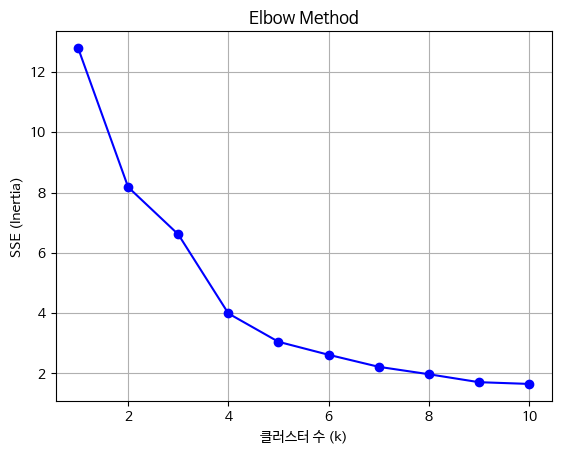

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. 데이터 불러오기
df = df_2024_final.copy()

# 2. RUN 중심 스코어 계산
df['run_score'] = MinMaxScaler().fit_transform(df[['러닝_도로_면적비율']])

# 3. 런트립 적합성 지표 합산
df['runtrip_score'] = df['run_score'] + df['A8SF_3'] + df['NA7_6'] + df['A4_1']

# 4. 전처리: N_VISITS는 MinMaxScaler 적용
minmax_scaler_visits = MinMaxScaler()
n_visits_final = minmax_scaler_visits.fit_transform(df[['N_VISITS']])

df['N_VISITS_scaled'] = n_visits_final

# 5. 전처리: D_TRA1_ONE_COST는 MinMaxScaler만 적용
df['D_TRA1_ONE_COST_scaled'] = MinMaxScaler().fit_transform(df[['D_TRA1_ONE_COST']])

# 6. TRIP 중심 스코어 계산 (정규화된 값 사용)
df['trip_score'] = df['N_VISITS_scaled'] + df['A9'] + df['A10'] + df['D_TRA1_ONE_COST_scaled']

# 7. 총합 스코어 계산
#df['total_score'] = (df['runtrip_score']+ df['trip_score'])/2

# 8. 클러스터링 대상 피처 선택
cluster_features = ['runtrip_score', 'trip_score']
X_cluster = df[cluster_features]

# 9. 정규화
X_scaled = MinMaxScaler().fit_transform(X_cluster)

# 최적의 cluster 개수 확인 (elbow 방법)
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)  # X_scaled: 정규화된 feature
    sse.append(kmeans.inertia_)

plt.plot(K_range, sse, 'bo-')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.grid(True)
3plt.show()

Elbow Method를 통해 클러스터 수를 분석한 결과, k=3 또는 k=4에서 곡선의 꺾임이 나타나며 클러스터링의 적정 구간으로 판단되었습니다.

클러스터 분석의 목적은 ‘런트립지수’와 ‘트립지수’의 조합에 따라

•	런트립지수 높음 & 트립지수 높음 (HH)

•	런트립지수 낮음 & 트립지수 높음 (LH)

•	런트립지수 높음 & 트립지수 낮음 (HL)

•	런트립지수 낮음 & 트립지수 낮음 (LL)

의 4가지 유형으로 구분하는 것이므로, 클러스터 수 k=4로 설정하여 클러스터링을 진행하였습니다.

cluster
0     39
1    112
2     28
3     50
Name: count, dtype: int64


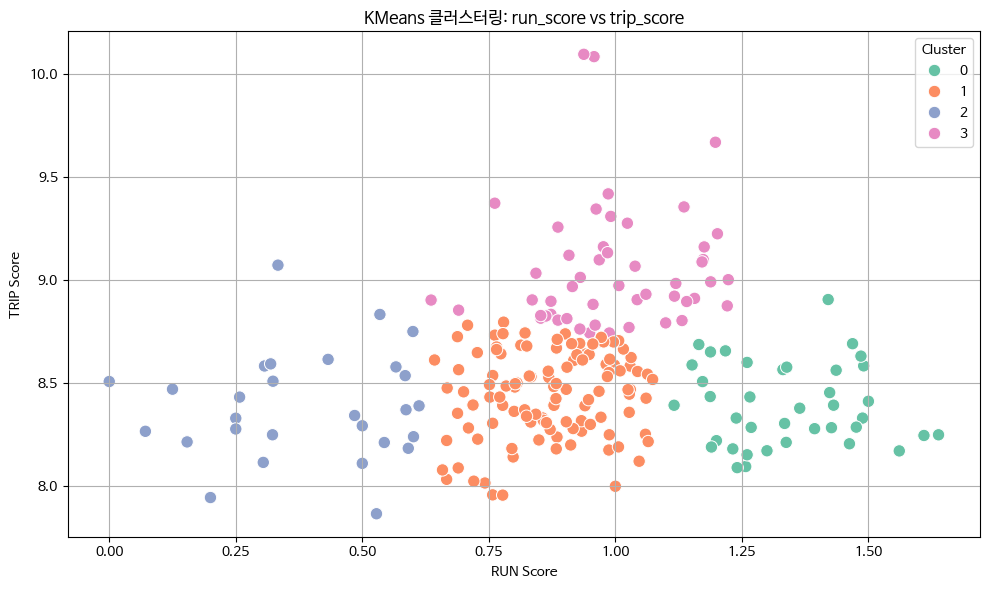


📋 클러스터별 평균 스코어:
         runtrip_score  trip_score
cluster                           
0                 1.34        8.40
1                 0.87        8.45
2                 0.39        8.39
3                 0.99        9.05


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np


# KMeans 클러스터링 진행
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터 분포 확인
print(df['cluster'].value_counts().sort_index())

# 클러스터링 시각화 (2D: run_score vs trip_score)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='runtrip_score', y='trip_score',
    hue='cluster', palette='Set2', s=80
)
plt.title("KMeans 클러스터링: run_score vs trip_score")
plt.xlabel("RUN Score")
plt.ylabel("TRIP Score")
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 각 클러스터별 대표 통계 확인
cluster_summary = df.groupby('cluster')[['runtrip_score', 'trip_score']].mean()
print("\n📋 클러스터별 평균 스코어:")
print(cluster_summary.round(2))

- **런트립지수가 높고 트립지수가 낮은 클러스터 0을 분석 대상으로 결정**

In [ ]:
# 클러스터 0에 해당하는 지역만 추출
cluster_0_df = df[df['cluster'] == 0]

# 중복 없이 지역코드(D_TRA1_1_SPOT) 목록 확인
cluster_0_df = cluster_0_df.reset_index()
unique_regions_cluster_0 = cluster_0_df['D_TRA1_1_SPOT'].unique()
print(unique_regions_cluster_0)

# 시/도 확인
cluster_0_df['시도'].value_counts()

[22310. 23020. 23320. 25010. 25020. 25030. 25040. 25050. 31020. 31030.
 31040. 31060. 31070. 31080. 31090. 31100. 31110. 31120. 31130. 31140.
 31150. 31160. 31170. 31180. 31200. 31210. 31220. 31230. 31240. 31250.
 31260. 31270. 31280. 31350. 31370. 31380. 36360. 36410. 36440.]


,count
시도,
경기도,28
대전광역시,5
전라남도,3
인천광역시,2
대구광역시,1


In [ ]:
unique_regions_cluster_0 = pd.DataFrame(unique_regions_cluster_0)
unique_regions_cluster_0.columns = ['region']
unique_regions_cluster_0

,region
0,22310.0
1,23020.0
2,23320.0
3,25010.0
4,25020.0
5,25030.0
6,25040.0
7,25050.0
8,31020.0
9,31030.0


In [ ]:
unique_regions_cluster_0.to_csv('분석대상_지역코드.csv', header=False)

### 시각화

In [ ]:
df = pd.read_csv('/content/분석대상_지역코드.csv', header = None)
df.columns = ['index', 'sgg_code']

df.head()

,index,sgg_code
0,0,22310.0
1,1,23020.0
2,2,23320.0
3,3,25010.0
4,4,25020.0


#### 법정동 매핑

In [ ]:
# 시군구 코드 CSV 경로
code_path = '/content/MyDrive/MyDrive/BDA 공모전/data/한국승강기안전공단_홈페이지 시군구 관리 코드.csv'

# CSV 파일 읽기
code_df = pd.read_csv(code_path, dtype={'시도코드': str, '시군구코드': str, '시군구명': str})

# 병합용 코드 필드 생성 (시도코드 + 시군구코드 결합)
code_df['full_code'] = code_df['시도코드'].str.zfill(2) + code_df['시군구코드'].str.zfill(3)

# 매핑을 위한 full_code 컬럼 생성
df['full_code'] = df['sgg_code'].astype(int).astype(str).str.zfill(5)

# 시군구명 병합
df = df.merge(code_df[['full_code', '시군구명']], on='full_code', how='left')

# 결과 확인
df

,index,sgg_code,full_code,시군구명
0,0,22310.0,22310,달성군
1,1,23020.0,23020,동구
2,2,23320.0,23320,옹진군
3,3,25010.0,25010,동구
4,4,25020.0,25020,중구
5,5,25030.0,25030,서구
6,6,25040.0,25040,유성구
7,7,25050.0,25050,대덕구
8,8,31020.0,31020,성남시
9,9,31030.0,31030,의정부시


#### Geomtry 정보 추가

In [ ]:
import geopandas as gpd
import pandas as pd
from glob import glob
import os

# 경로 설정
folder_path = "/content/MyDrive/MyDrive/BDA 공모전/data/행정구역"
file_list = glob(os.path.join(folder_path, "**/*.shp"), recursive=True)

print(f"발견된 SHP 파일 수: {len(file_list)}")

# 기준 CRS 설정 (예: EPSG:5179 또는 EPSG:4326)
target_crs = "EPSG:5179"

gdf_list = []
for file in file_list:
    try:
        gdf = gpd.read_file(file)
        if not gdf.empty:
            if gdf.crs != target_crs:
                gdf = gdf.to_crs(target_crs)
            gdf_list.append(gdf)
        else:
            print(f"비어 있는 파일: {file}")
    except Exception as e:
        print(f"오류 발생 파일: {file}")
        print(f"   └─ 오류 메시지: {e}")

# 병합
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=target_crs)
    print("병합 완료! 총 행 수:", len(merged_gdf))
    display(merged_gdf.head())
else:
    print("유효한 SHP 파일이 없습니다.")

발견된 SHP 파일 수: 17
병합 완료! 총 행 수: 252


,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,28110,인천광역시 중구,1.0,28110,"MULTIPOLYGON (((912459.388 1929098.827, 912458..."
1,28140,인천광역시 동구,370.0,28140,"MULTIPOLYGON (((923665.19 1944392.274, 923667...."
2,28177,인천광역시 미추홀구,51.0,28177,"POLYGON ((925717.567 1942881.391, 925808.775 1..."
3,28185,인천광역시 연수구,1.0,28185,"MULTIPOLYGON (((912809.566 1929524.141, 912808..."
4,28200,인천광역시 남동구,1030.0,28200,"POLYGON ((930516.282 1942196.229, 930534.626 1..."


In [ ]:
import geopandas as gpd

# 시군구명 컬럼 생성 (구 단위일 경우만 추출 가능하므로 예외적 처리 포함)
merged_gdf['시'] = merged_gdf['SGG_NM'].apply(lambda x: x.split()[1] if len(x.split()) >= 2 else x)

# 시 단위로 묶어서 geometry union
gdf_union = merged_gdf.dissolve(by='시', as_index=False)[['시', 'geometry']]

# df['시군구명']이 '성남시', '안양시' 등일 때 '시' 이름만 비교해서 병합
df = df.merge(gdf_union, left_on='시군구명', right_on='시', how='left')

# 불필요한 열 제거 및 정리
df.drop(columns=['시'], inplace=True)

# 결과 확인
df.head()

,index,sgg_code,full_code,시군구명,geometry
0,0,22310.0,22310,달성군,"MULTIPOLYGON (((1088851.94 1759862.035, 108888..."
1,1,23020.0,23020,동구,"MULTIPOLYGON (((948713.202 1685315.074, 948748..."
2,2,23320.0,23320,옹진군,"MULTIPOLYGON (((847456.798 1882687.471, 847457..."
3,3,25010.0,25010,동구,"MULTIPOLYGON (((948713.202 1685315.074, 948748..."
4,4,25020.0,25020,중구,"MULTIPOLYGON (((902731.432 1933060.463, 902732..."


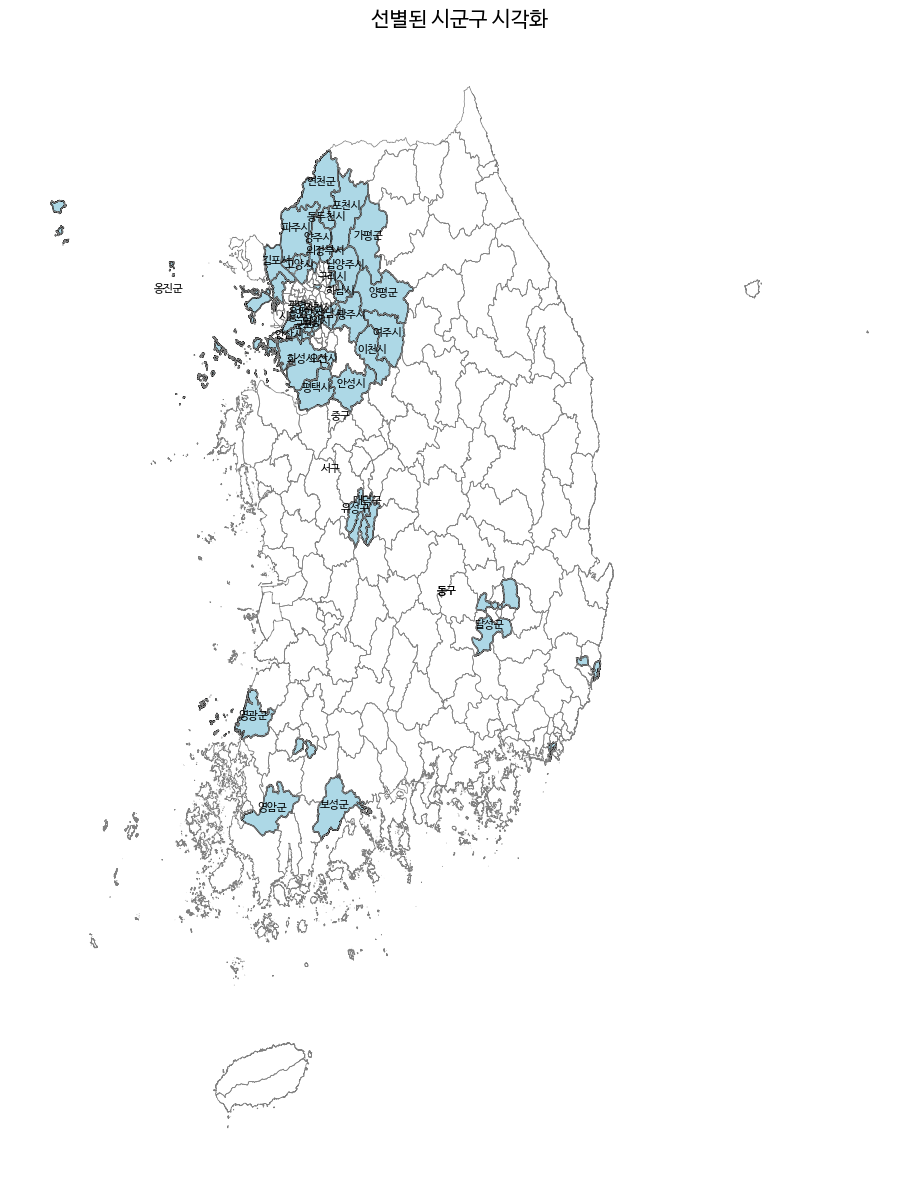

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# GeoDataFrame 변환
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')
gdf = gdf[~gdf['geometry'].isna()]  # geometry 유효한 것만

# 중심좌표 계산
gdf['coords'] = gdf['geometry'].centroid

# 시각화
fig, ax = plt.subplots(figsize=(10, 12))

# 전체 경계선
merged_gdf.boundary.plot(ax=ax, linewidth=0.5, edgecolor='gray')

# 주요 지역 색칠
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# 중심에 시군구명 표시
for idx, row in gdf.iterrows():
    name = row['시군구명']
    x, y = row['coords'].x, row['coords'].y
    plt.text(x, y, name, fontsize=8, ha='center')

plt.title('선별된 시군구 시각화', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()

# 네이버 블로그 크롤링

In [ ]:
import pandas as pd
from collections import Counter

# 데이터 불러오기
# 함께 첨부한 crawl_naver_blog.py 코드로 진행한 크롤링 결과 파일
df = pd.read_csv("/content/naver_blogs.csv")

# 전국 시군구 키워드 리스트
korea_regions = [
    # 서울특별시
    "강남구", "강동구", "강북구", "강서구", "관악구", "광진구", "구로구", "금천구", "노원구", "도봉구", "동대문구", "동작구", "마포구", "서대문구", "서초구", "성동구", "성북구", "송파구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중구", "중랑구",

    # 부산광역시
    "강서구", "금정구", "남구", "동구", "동래구", "부산진구", "북구", "사상구", "사하구", "서구", "수영구", "연제구", "영도구", "중구", "해운대구", "기장군",

    # 대구광역시
    "남구", "달서구", "달성군", "동구", "북구", "서구", "수성구", "중구",

    # 인천광역시
    "계양구", "남구", "남동구", "동구", "부평구", "서구", "연수구", "중구", "강화군", "옹진군",

    # 광주광역시
    "광산구", "남구", "동구", "북구", "서구",

    # 대전광역시
    "대덕구", "동구", "서구", "유성구", "중구",

    # 울산광역시
    "남구", "동구", "북구", "울주군", "중구",

    # 세종특별자치시
    "세종시", "세종특별자치시",

    # 경기도
    "수원시", "성남시", "고양시", "용인시", "부천시", "안산시", "안양시", "남양주시", "화성시", "평택시", "의정부시", "시흥시", "파주시", "김포시", "광명시", "광주시", "군포시", "오산시", "이천시", "안성시", "의왕시", "하남시", "양주시", "구리시", "포천시", "동두천시", "여주시", "연천군", "가평군", "양평군",

    # 강원도
    "춘천시", "원주시", "강릉시", "동해시", "태백시", "속초시", "삼척시", "홍천군", "횡성군", "영월군", "평창군", "정선군", "철원군", "화천군", "양구군", "인제군", "고성군", "양양군",

    # 충청북도
    "청주시", "충주시", "제천시", "보은군", "옥천군", "영동군", "증평군", "진천군", "괴산군", "음성군", "단양군",

    # 충청남도
    "천안시", "공주시", "보령시", "아산시", "서산시", "논산시", "계룡시", "당진시", "금산군", "부여군", "서천군", "청양군", "홍성군", "예산군", "태안군",

    # 전라북도
    "전주시", "군산시", "익산시", "정읍시", "남원시", "김제시", "완주군", "진안군", "무주군", "장수군", "임실군", "순창군", "고창군", "부안군",

    # 전라남도
    "목포시", "여수시", "순천시", "나주시", "광양시", "담양군", "곡성군", "구례군", "고흥군", "보성군", "화순군", "장흥군", "강진군", "해남군", "영암군", "무안군", "함평군", "영광군", "장성군", "완도군", "진도군", "신안군",

    # 경상북도
    "포항시", "경주시", "김천시", "안동시", "구미시", "영주시", "영천시", "상주시", "문경시", "경산시", "군위군", "의성군", "청송군", "영양군", "영덕군", "청도군", "고령군", "성주군", "칠곡군", "예천군", "봉화군", "울진군", "울릉군",

    # 경상남도
    "창원시", "진주시", "통영시", "사천시", "김해시", "밀양시", "거제시", "양산시", "의령군", "함안군", "창녕군", "고성군", "남해군", "하동군", "산청군", "함양군", "거창군", "합천군",

    # 제주특별자치도
    "제주시", "서귀포시"
]

# 각 시군구별로 몇 개 블로그에 포함되었는지 카운트
region_blog_counts = {}
for region in korea_regions:
    count = 0
    for idx, row in df.iterrows():
        # 제목 또는 본문에 해당 시군구가 있으면 +1
        title_text = str(row['title']) if pd.notna(row['title']) else ""
        content_text = str(row['본문']) if pd.notna(row['본문']) else ""

        if region in title_text or region in content_text:
            count += 1

    if count > 0:
        region_blog_counts[region] = count

# 1위 시군구 찾기
if region_blog_counts:
    top_region, top_count = max(region_blog_counts.items(), key=lambda x: x[1])
    print(f" 런트립 관련 블로그에서 가장 많이 언급된 시군구: {top_region} ({top_count}개 블로그)")
else:
    print("시군구 키워드가 발견되지 않았습니다.")

# 시도별로 그룹화하여 요약
sido_summary = {}
for region, count in region_blog_counts.items():
    # 시도 판별
    if region in ["강남구", "강동구", "강북구", "강서구", "관악구", "광진구", "구로구", "금천구", "노원구", "도봉구", "동대문구", "동작구", "마포구", "서대문구", "서초구", "성동구", "성북구", "송파구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중구", "중랑구"]:
        sido = "서울"
    elif region in ["강서구", "금정구", "남구", "동구", "동래구", "부산진구", "북구", "사상구", "사하구", "서구", "수영구", "연제구", "영도구", "중구", "해운대구", "기장군"]:
        sido = "부산"
    elif region in ["남구", "달서구", "달성군", "동구", "북구", "서구", "수성구", "중구"]:
        sido = "대구"
    elif region in ["계양구", "남구", "남동구", "동구", "부평구", "서구", "연수구", "중구", "강화군", "옹진군"]:
        sido = "인천"
    elif region in ["광산구", "남구", "동구", "북구", "서구"]:
        sido = "광주"
    elif region in ["대덕구", "동구", "서구", "유성구", "중구"]:
        sido = "대전"
    elif region in ["남구", "동구", "북구", "울주군", "중구"]:
        sido = "울산"
    elif region in ["세종시", "세종특별자치시"]:
        sido = "세종"
    elif region in ["수원시", "성남시", "고양시", "용인시", "부천시", "안산시", "안양시", "남양주시", "화성시", "평택시", "의정부시", "시흥시", "파주시", "김포시", "광명시", "광주시", "군포시", "오산시", "이천시", "안성시", "의왕시", "하남시", "양주시", "구리시", "포천시", "동두천시", "여주시", "연천군", "가평군", "양평군"]:
        sido = "경기"
    elif region in ["춘천시", "원주시", "강릉시", "동해시", "태백시", "속초시", "삼척시", "홍천군", "횡성군", "영월군", "평창군", "정선군", "철원군", "화천군", "양구군", "인제군", "고성군", "양양군"]:
        sido = "강원"
    elif region in ["청주시", "충주시", "제천시", "보은군", "옥천군", "영동군", "증평군", "진천군", "괴산군", "음성군", "단양군"]:
        sido = "충북"
    elif region in ["천안시", "공주시", "보령시", "아산시", "서산시", "논산시", "계룡시", "당진시", "금산군", "부여군", "서천군", "청양군", "홍성군", "예산군", "태안군"]:
        sido = "충남"
    elif region in ["전주시", "군산시", "익산시", "정읍시", "남원시", "김제시", "완주군", "진안군", "무주군", "장수군", "임실군", "순창군", "고창군", "부안군"]:
        sido = "전북"
    elif region in ["목포시", "여수시", "순천시", "나주시", "광양시", "담양군", "곡성군", "구례군", "고흥군", "보성군", "화순군", "장흥군", "강진군", "해남군", "영암군", "무안군", "함평군", "영광군", "장성군", "완도군", "진도군", "신안군"]:
        sido = "전남"
    elif region in ["포항시", "경주시", "김천시", "안동시", "구미시", "영주시", "영천시", "상주시", "문경시", "경산시", "군위군", "의성군", "청송군", "영양군", "영덕군", "청도군", "고령군", "성주군", "칠곡군", "예천군", "봉화군", "울진군", "울릉군"]:
        sido = "경북"
    elif region in ["창원시", "진주시", "통영시", "사천시", "김해시", "밀양시", "거제시", "양산시", "의령군", "함안군", "창녕군", "고성군", "남해군", "하동군", "산청군", "함양군", "거창군", "합천군"]:
        sido = "경남"
    elif region in ["제주시", "서귀포시"]:
        sido = "제주"
    else:
        sido = "기타"

    if sido in sido_summary:
        sido_summary[sido] += count
    else:
        sido_summary[sido] = count

print(f"\n=== 시도별 블로그 수 요약 ===")
for sido, count in sorted(sido_summary.items(), key=lambda x: x[1], reverse=True):
    print(f"{sido}: {count}개 블로그")

 런트립 관련 블로그에서 가장 많이 언급된 시군구: 군산시 (11개 블로그)

=== 시도별 블로그 수 요약 ===
부산: 28개 블로그
경기: 24개 블로그
강원: 22개 블로그
전남: 22개 블로그
경북: 20개 블로그
제주: 18개 블로그
전북: 17개 블로그
서울: 13개 블로그
충북: 6개 블로그
경남: 6개 블로그
대구: 3개 블로그
충남: 3개 블로그


# 결론

서울과 부산은 이미 관광지로 널리 알려져 있으므로 분석 대상에서 제외하였습니다.

그 외 지역 중에서는 런트립 관련 클러스터링 시각화 결과, 대부분이 경기 지역에 밀집해 있었고, 네이버 블로그 크롤링 결과에서도 경기권이 언급된 블로그가 총 24건으로 두 번째로 높은 언급량을 기록했습니다.

이를 바탕으로 경기도가 런트립 발전 가능성이 높은 지역이라고 판단하여, 본 분석에서는 경기도를 중심으로 심화 분석을 진행하였습니다.